__Dataset includes:__
* EmpID: Employee ID
* Employee_Name: Full name of the employee.
* DeptID: Department ID
* FromDiversityJobFairID: ID for whether the employee was hired through a diversity job fair
Likely a binary indicator (0 or 1), where 0 means no, and 1 means yes. This identifies if the employee came from a diversity recruitment event.
* Salary: Employee's salary
Indicates the annual or hourly salary of the employee.
* Position: Job title/role of the employee (e.g., "Production Technician I")
* State: State of the employee’s work location
* Zip: Zip code of the employee’s location
* DOB: Date of Birth of the employee
* Sex: Gender of the employee (e.g., M or F)
* MaritalDesc: Marital Status Description
* CitizenDesc: Citizenship description (e.g., "US Citizen")
* HispanicLatino: Whether the employee is Hispanic or Latino (Yes/No)
* RaceDesc: Employee's race description (e.g., White, Black, Asian)
* DateofHire: Date the employee was hired
* DateofTermination: Date of employee termination
* TermReason: Reason for termination (e.g., "career change", "return to school")
The reason the employee left the company, if applicable.
* EmploymentStatus: Current employment status (e.g., "Active", "Voluntarily Terminated")
Describes if the employee is still employed or has left.
* Department: Name of the department the employee works in (e.g., "IT/IS")
* ManagerName: Name of the employee's manager
Indicates the name of the employee's supervisor.
* ManagerID: Manager's employee ID.
* RecruitmentSource: Source from which the employee was recruited (e.g., LinkedIn, Indeed)
* PerformanceScore: Performance evaluation score (e.g., "Exceeds", "Fully Meets")
* EngagementSurvey: Employee’s engagement survey score
Score based on employee’s participation and feedback in an engagement survey.
* EmpSatisfaction: Employee’s satisfaction score
Represents how satisfied the employee is with their job.
* SpecialProjectsCount: Number of special projects the employee is working on
* LastPerformanceReview_Date: Date of the last performance review
The date when the employee last had a performance review.
* DaysLateLast30: Number of days the employee was late in the last 30 days
* Tracks the employee’s tardiness in the past month.
* Absences: Number of absences the employee had

# Exploratory Data Analysis

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pymysql as py
import warnings
warnings.filterwarnings('ignore')
sns.set()


In [19]:
# Establishing a connection to the MySQL database
db = py.connect(
    host='localhost',
    user='root',
    password='Rafi@mysql123',
    database='hr_employee_db'
)
cur = db.cursor()
cur

In [20]:
cur.execute('SHOW TABLES')
for table in cur:
    print(table)

('hr_employee',)


In [21]:
# I loaded the dataset from MySQL to Jupyter notebook using Python
query = '''SELECT * 
            FROM hr_employee'''

cur.execute(query)
data = cur.fetchall()

df = pd.DataFrame(data, columns = ['EmpID', 'Employee_Name','Sex', 'MaritalDesc', 'DeptID',
                                    'FromDiversityJobFairID', 'Salary',
                                    'Position', 'State', 'Zip', 'DOB', 
                                    'CitizenDesc', 'HispanicLatino', 'RaceDesc', 'DateofHire',
                                    'DateofTermination', 'TermReason', 'EmploymentStatus', 'Department',
                                    'ManagerName', 'ManagerID', 'RecruitmentSource', 'PerformanceScore',
                                    'EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount',
                                    'LastPerformanceReview_Date', 'DaysLateLast30', 'Absences'])
pd.options.display.max_columns = None
df.head()

,EmpID,Employee_Name,Sex,MaritalDesc,DeptID,FromDiversityJobFairID,Salary,Position,State,Zip,DOB,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,10001,Calvin Candie,M,Single,5,0,72640.00,Production Manager,MA,2169,1983-08-09,US Citizen,No,White,2016-01-28,None,N/A-StillEmployed,Active,Production,Janet King,2,Indeed,Exceeds,5.0,3,0,2019-02-22,0,14
1,10002,Linda Anderson,F,Single,5,0,57568.00,Production Technician I,MA,1844,1977-05-22,US Citizen,No,White,2012-01-09,None,N/A-StillEmployed,Active,Production,Amy Dunn,11,LinkedIn,Exceeds,5.0,5,0,2019-01-07,0,15
2,10003,Helen Billis,F,Married,5,0,62910.00,Production Technician I,MA,2031,1989-09-01,US Citizen,No,White,2014-07-07,None,N/A-StillEmployed,Active,Production,Brannon Miller,12,Indeed,Exceeds,5.0,3,0,2019-02-27,0,19
3,10004,Lindsay Lynch,F,Single,5,1,47434.00,Production Technician I,MA,1844,1973-02-14,US Citizen,Yes,Black or African American,2011-11-07,2015-11-14,Another position,Voluntarily Terminated,Production,Webster Butler,39,Diversity Job Fair,Exceeds,5.0,4,0,2015-02-02,0,17
4,10005,Lucas Patronick,M,Single,4,1,108987.00,Software Engineer,MA,1844,1979-02-20,US Citizen,No,Black or African American,2011-11-07,2015-09-07,Another position,Voluntarily Terminated,Software Engineering,Alex Sweetwater,10,Diversity Job Fair,Exceeds,5.0,5,3,2015-08-16,0,13


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   EmpID                       311 non-null    int64  
 1   Employee_Name               311 non-null    object 
 2   Sex                         311 non-null    object 
 3   MaritalDesc                 311 non-null    object 
 4   DeptID                      311 non-null    int64  
 5   FromDiversityJobFairID      311 non-null    int64  
 6   Salary                      311 non-null    object 
 7   Position                    311 non-null    object 
 8   State                       311 non-null    object 
 9   Zip                         311 non-null    object 
 10  DOB                         311 non-null    object 
 11  CitizenDesc                 311 non-null    object 
 12  HispanicLatino              311 non-null    object 
 13  RaceDesc                    311 non

In [23]:
date_columns = ['DOB', 'DateofHire', 'DateofTermination', 'LastPerformanceReview_Date']
# I changed the date colunms data type to datecolumns
for i in date_columns:
    df[i] = pd.to_datetime(df[i])

# changed the data type of salary column to float from object type
df['Salary'] = df['Salary'].astype('float')

In [25]:
# summary statistics
df.describe(include = 'all')

,EmpID,Employee_Name,Sex,MaritalDesc,DeptID,FromDiversityJobFairID,Salary,Position,State,Zip,DOB,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
count,311.000000,311,311,311,311.000000,311.000000,311.000000,311,311,311,311,311,311,311,311,104,311,311,311,311,311.000000,311,311,311.000000,311.000000,311.000000,311,311.000000,311.000000
unique,NaN,311,2,5,NaN,NaN,NaN,32,28,158,NaN,3,4,6,NaN,NaN,18,3,6,21,NaN,9,4,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Calvin Candie,F,Single,NaN,NaN,NaN,Production Technician I,MA,1886,NaN,US Citizen,No,White,NaN,NaN,N/A-StillEmployed,Active,Production,Brannon Miller,NaN,Indeed,Fully Meets,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,176,137,NaN,NaN,NaN,137,276,13,NaN,295,282,187,NaN,NaN,207,207,209,22,NaN,87,243,NaN,NaN,NaN,NaN,NaN,NaN
mean,10156.000000,NaN,NaN,NaN,4.610932,0.093248,69020.684887,NaN,NaN,NaN,1979-02-06 09:48:02.315112544,NaN,NaN,NaN,2013-02-03 22:50:32.797427712,2015-06-14 11:46:09.230769152,NaN,NaN,NaN,NaN,15.199357,NaN,NaN,4.110000,3.890675,1.218650,2017-09-10 21:17:56.527331072,0.414791,10.237942
min,10001.000000,NaN,NaN,NaN,1.000000,0.000000,45046.000000,NaN,NaN,NaN,1951-01-02 00:00:00,NaN,NaN,NaN,2006-01-09 00:00:00,2010-08-30 00:00:00,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,1.120000,1.000000,0.000000,2010-07-14 00:00:00,0.000000,1.000000
25%,10078.500000,NaN,NaN,NaN,5.000000,0.000000,55501.500000,NaN,NaN,NaN,1973-12-03 00:00:00,NaN,NaN,NaN,2011-07-11 00:00:00,2014-01-10 12:00:00,NaN,NaN,NaN,NaN,10.000000,NaN,NaN,3.690000,3.000000,0.000000,2016-03-19 12:00:00,0.000000,5.000000
50%,10156.000000,NaN,NaN,NaN,5.000000,0.000000,62810.000000,NaN,NaN,NaN,1980-09-30 00:00:00,NaN,NaN,NaN,2013-02-18 00:00:00,2015-09-22 00:00:00,NaN,NaN,NaN,NaN,16.000000,NaN,NaN,4.280000,4.000000,0.000000,2019-01-16 00:00:00,0.000000,10.000000
75%,10233.500000,NaN,NaN,NaN,5.000000,0.000000,72036.000000,NaN,NaN,NaN,1986-05-29 12:00:00,NaN,NaN,NaN,2014-09-23 12:00:00,2016-09-08 06:00:00,NaN,NaN,NaN,NaN,19.500000,NaN,NaN,4.700000,5.000000,0.000000,2019-02-04 00:00:00,0.000000,15.000000
max,10311.000000,NaN,NaN,NaN,6.000000,1.000000,250000.000000,NaN,NaN,NaN,1992-08-17 00:00:00,NaN,NaN,NaN,2018-07-09 00:00:00,2018-11-10 00:00:00,NaN,NaN,NaN,NaN,39.000000,NaN,NaN,5.000000,5.000000,8.000000,2019-02-28 00:00:00,6.000000,20.000000


In [27]:
# Frequency of categorical variables
df.Sex.value_counts()

Sex
F     176
M     135
Name: count, dtype: int64

In [29]:

df.MaritalDesc.value_counts()

MaritalDesc
Single       137
Married      124
Divorced      30
Separated     12
Widowed        8
Name: count, dtype: int64

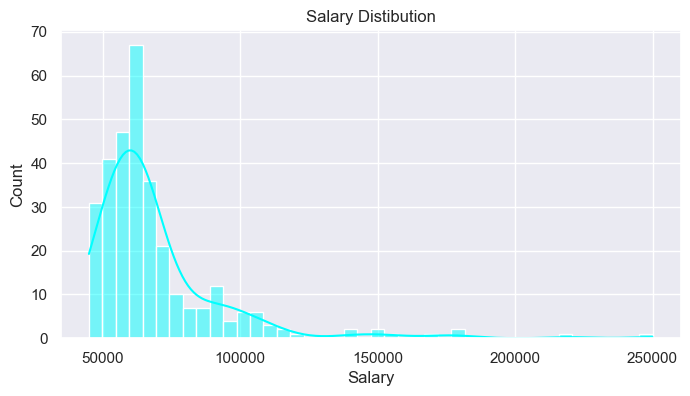

In [36]:
plt.figure(figsize = (8, 4))

sns.histplot(df.Salary, kde=True, color = 'cyan')
plt.title('Salary Distibution')
plt.show()

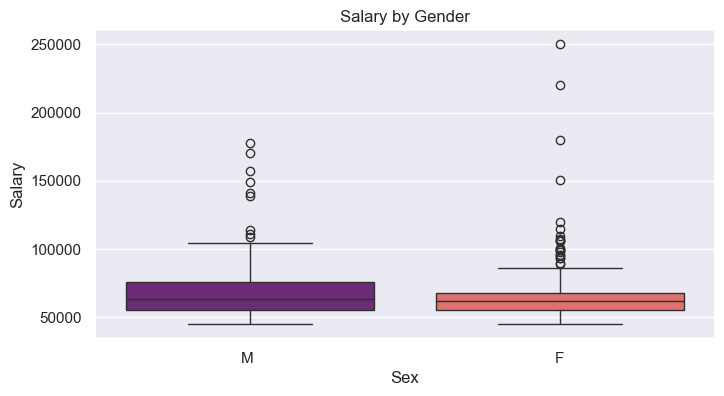

In [59]:
plt.figure(figsize = (8, 4))

sns.boxplot(x = 'Sex', y = 'Salary', data=df, palette='magma')
plt.title('Salary by Gender')
plt.show()

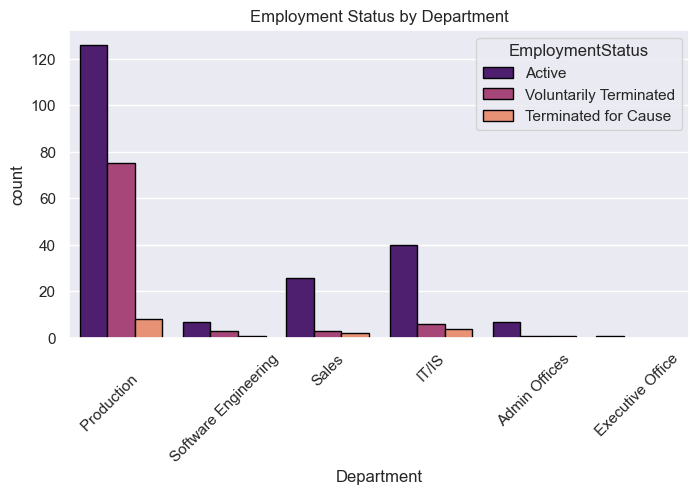

In [56]:
plt.figure(figsize = (8, 4))

sns.countplot(x = 'Department', hue = 'EmploymentStatus', data=df, palette='magma', edgecolor='black')
plt.title('Employment Status by Department')
plt.xticks(rotation=45)
plt.show()

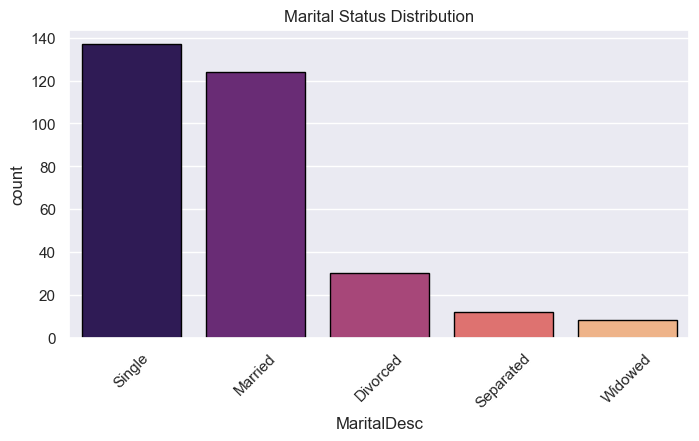

In [61]:
plt.figure(figsize = (8, 4))

sns.countplot(x = 'MaritalDesc', data=df, palette='magma', edgecolor='black')
plt.title('Marital Status Distribution')
plt.xticks(rotation=45)
plt.show()

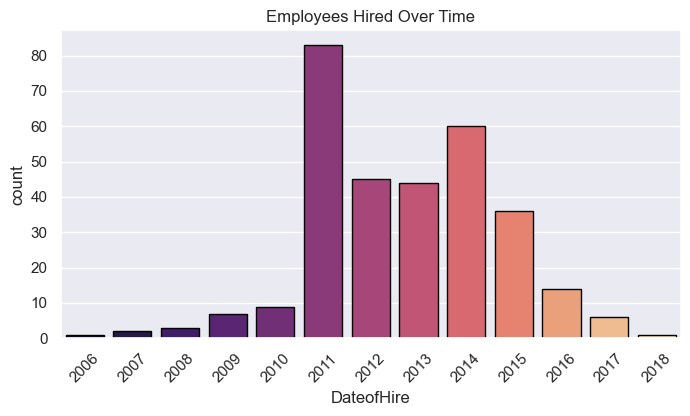

In [60]:
plt.figure(figsize = (8, 4))

sns.countplot(x = df['DateofHire'].dt.year, palette='magma', edgecolor='black')
plt.title('Employees Hired Over Time')
plt.xticks(rotation=45)
plt.show()

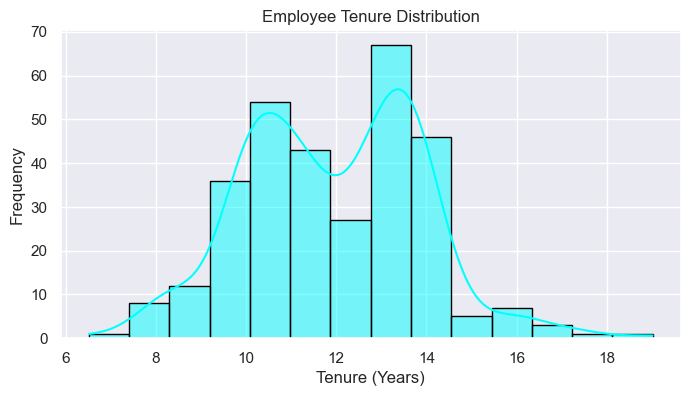

In [68]:
df['Tenure'] = (pd.to_datetime('today') - df['DateofHire']).dt.days / 365.25
plt.figure(figsize=(8, 4))
sns.histplot(df['Tenure'], color = 'cyan', kde=True, edgecolor = 'black')
plt.title('Employee Tenure Distribution')
plt.xlabel('Tenure (Years)')
plt.ylabel('Frequency')
plt.show()


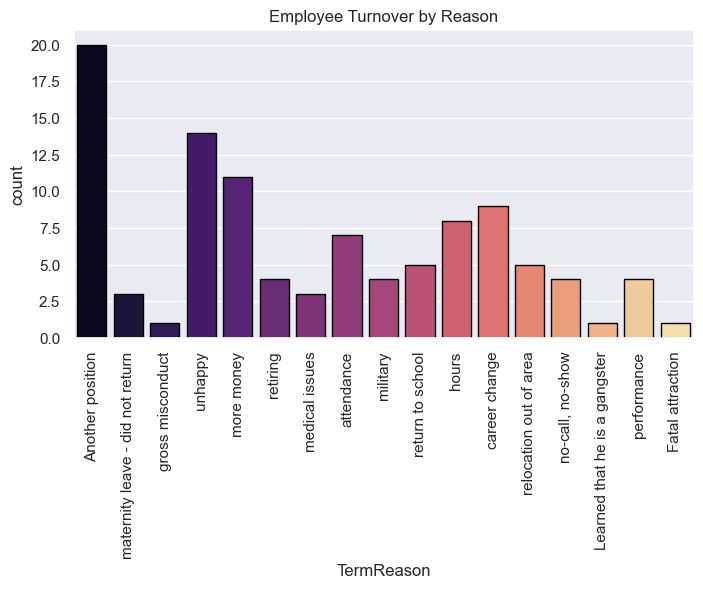

In [66]:
plt.figure(figsize = (8, 4))

sns.countplot(x = 'TermReason', data = df[df.TermReason != 'N/A-StillEmployed'], palette='magma', edgecolor='black')
plt.title('Employee Turnover by Reason')
plt.xticks(rotation=90)
plt.show()

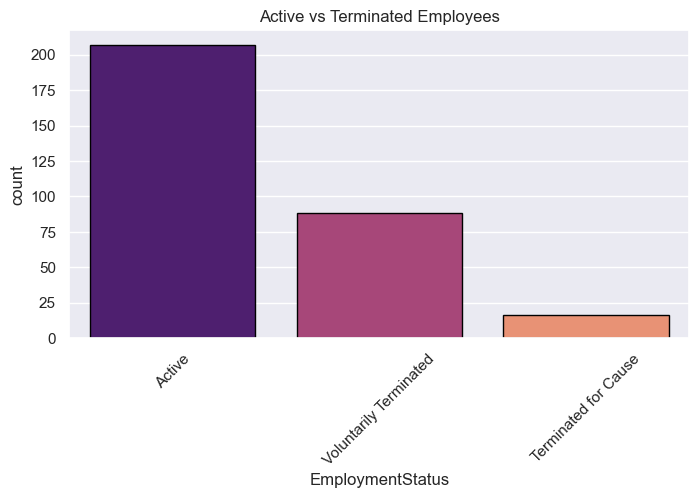

In [72]:
plt.figure(figsize = (8, 4))

sns.countplot(x = 'EmploymentStatus', data = df, palette='magma', edgecolor='black')
plt.title('Active vs Terminated Employees')
plt.xticks(rotation=45)
plt.show()

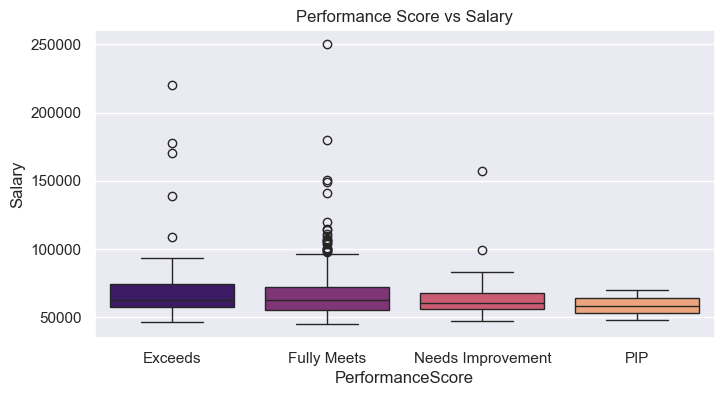

In [74]:
plt.figure(figsize = (8, 4))

sns.boxplot(x = 'PerformanceScore', y = 'Salary', data=df, palette='magma')
plt.title('Performance Score vs Salary')
plt.show()

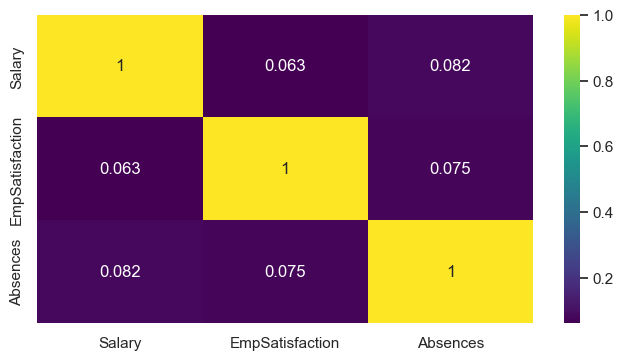

In [85]:
plt.figure(figsize = (8, 4))
correlation = df[['Salary', 'EmpSatisfaction', 'Absences']].corr()
sns.heatmap(correlation, annot=True, cmap='viridis')
plt.show()

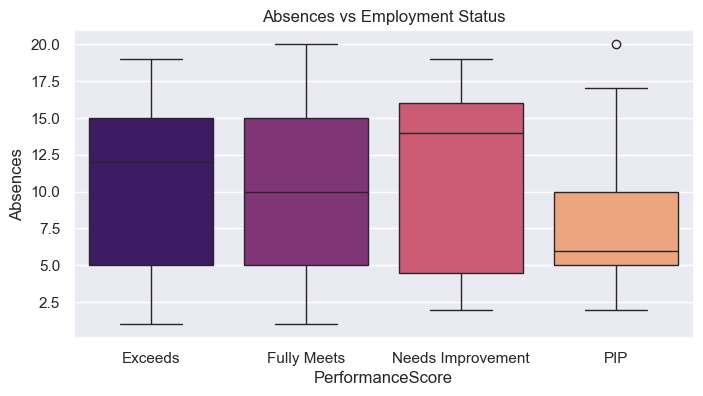

In [88]:
plt.figure(figsize = (8, 4))

sns.boxplot(x = 'EmploymentStatus', y = 'Absences', data=df, palette='magma')
plt.title('Absences vs Employment Status')
plt.show()

<Figure size 800x500 with 0 Axes>

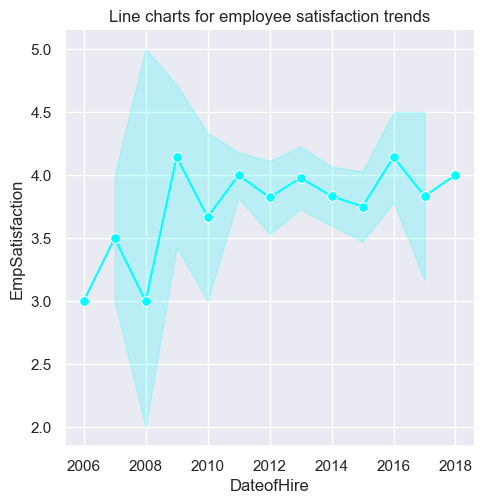

In [97]:
plt.figure(figsize = (8, 5))

sns.relplot(x = df['DateofHire'].dt.year, y = 'EmpSatisfaction', data=df, 
            kind = 'line', marker='o',color = 'cyan', markersize=7)
plt.title('Line charts for employee satisfaction trends')
plt.show()

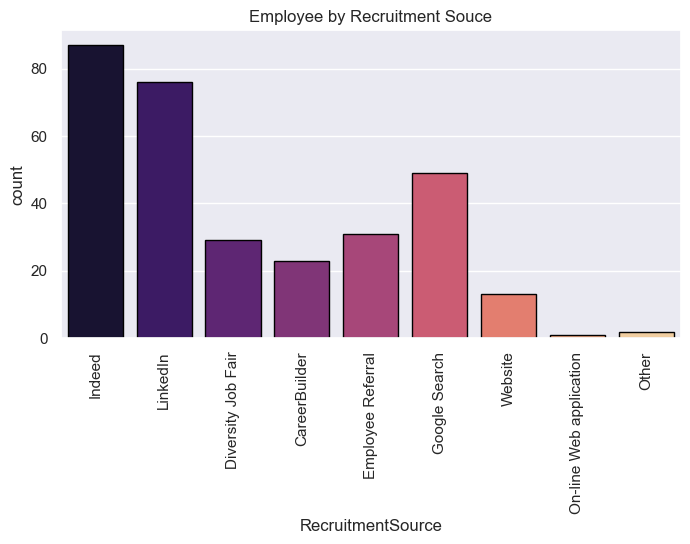

In [101]:
plt.figure(figsize = (8, 4))

sns.countplot(x = 'RecruitmentSource', data = df, palette='magma', edgecolor='black')
plt.title('Employee by Recruitment Souce')
plt.xticks(rotation=90)
plt.show()